In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import requests

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-price-competetion/sample_submission.csv
/kaggle/input/loan-price-competetion/train.csv
/kaggle/input/loan-price-competetion/test.csv
/kaggle/input/playground-series-s4e10/sample_submission.csv
/kaggle/input/playground-series-s4e10/train.csv
/kaggle/input/playground-series-s4e10/test.csv


## Creating a  DataFrame of Loan Data

In [3]:
df = pd.read_csv('/kaggle/input/playground-series-s4e10/sample_submission.csv')
df.head()

,id,loan_status
0,58645,0.5
1,58646,0.5
2,58647,0.5
3,58648,0.5
4,58649,0.5


In [4]:
#define the 'rows and columns of datset',df.shape
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns in this datset,')

There are 39098 rows and 2 columns in this datset,


In [5]:
#Handling missing datas in this dataset
df.isna().sum()

id             0
loan_status    0
dtype: int64

There is no missing values in this dataset..

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39098 entries, 0 to 39097
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           39098 non-null  int64  
 1   loan_status  39098 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 611.0 KB


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [8]:
# I want to know the feature Loan Status
print("The unique values are :")
df['loan_status'].unique()

The unique values are :


array([0.5])

### Then we can go on to the train dataset then to test

In [9]:
data = pd.read_csv('/kaggle/input/playground-series-s4e10/train.csv')
data.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [10]:
# the size of the data set
data.shape

(58645, 13)

In [11]:
data.isna().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

All features are cleaned

In [12]:
data.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


In [13]:
print(data.columns)

Index(['id', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status'],
      dtype='object')


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [15]:
data.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [16]:
print(f'rows: {data.shape[0]} columns: {data.shape[1]}')

rows: 58645 columns: 13


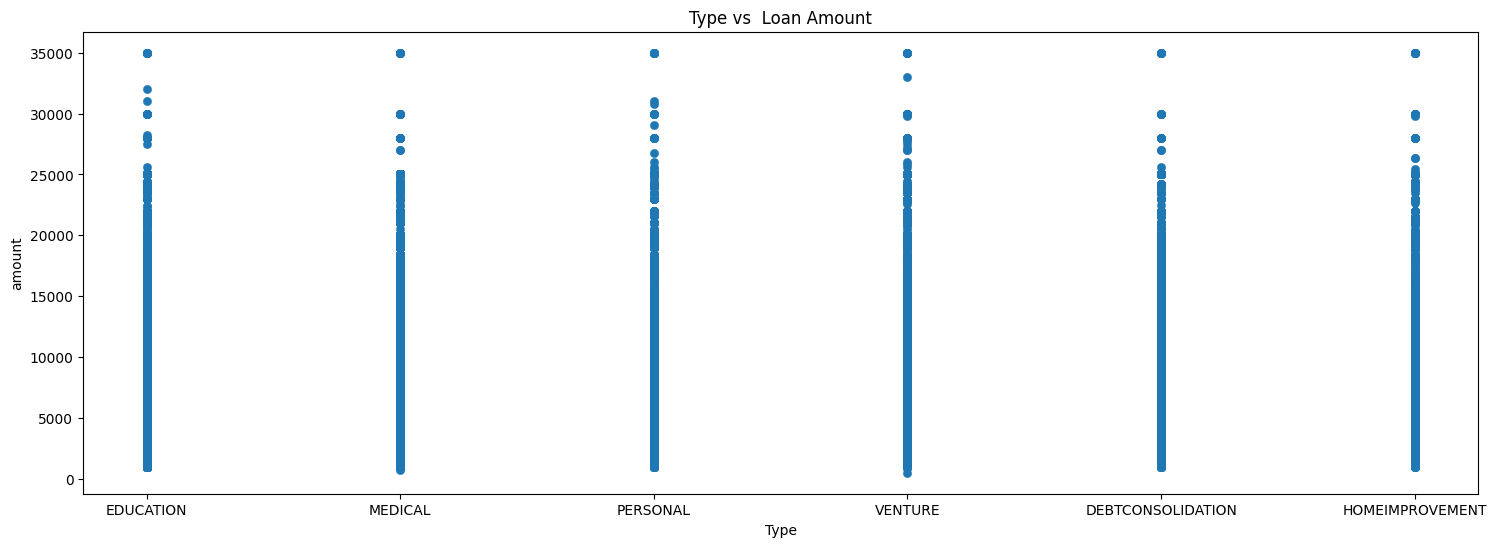

In [17]:
# I want to create an bar plot Person Loan Intent vs Loan amount
loan_intent = list(data['loan_intent'].unique())
plt.figure(figsize=(18,6))
plt.scatter(data['loan_intent'], data['loan_amnt'], linewidths=0.3)
# plt.bar(data['loan_intent'], data['loan_amnt'])
plt.title("Type vs  Loan Amount")
plt.xlabel("Type")
plt.ylabel("amount")
plt.show()

In [18]:
print('Loan Grades:', data['loan_grade'].unique())

Loan Grades: ['B' 'C' 'A' 'D' 'E' 'F' 'G']


In [19]:
maps = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7}
data['loan_grade'] = data.loan_grade.map(maps)

In [20]:
data.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,2,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,3,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,1,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,2,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,1,6000,6.92,0.10,N,3,0


In [21]:
data['cb_person_default_on_file'] = data['cb_person_default_on_file'].map({'N':0, 'Y':1})

In [22]:
data['person_home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [23]:
data.drop(columns=['loan_intent','person_home_ownership']).corr()

,id,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
id,1.000000,0.008608,-0.001896,0.005376,-0.002184,-0.000403,-0.003454,-0.002677,-0.001681,0.008139,-0.008138
person_age,0.008608,1.000000,0.102176,0.121276,0.016497,0.050378,0.009653,-0.031975,0.004408,0.874260,-0.001130
person_income,-0.001896,0.102176,1.000000,0.164042,-0.059279,0.310942,-0.057611,-0.280314,-0.035514,0.082727,-0.169956
person_emp_length,0.005376,0.121276,0.164042,1.000000,-0.091514,0.092046,-0.101910,-0.065824,-0.054467,0.102842,-0.100428
loan_grade,-0.002184,0.016497,-0.059279,-0.091514,1.000000,0.113273,0.935837,0.153865,0.550677,0.012276,0.385908
loan_amnt,-0.000403,0.050378,0.310942,0.092046,0.113273,1.000000,0.113582,0.647266,0.020271,0.045720,0.144982
loan_int_rate,-0.003454,0.009653,-0.057611,-0.101910,0.935837,0.113582,1.000000,0.152201,0.501841,0.007535,0.338948
loan_percent_income,-0.002677,-0.031975,-0.280314,-0.065824,0.153865,0.647266,0.152201,1.000000,0.042979,-0.023202,0.378280
cb_person_default_on_file,-0.001681,0.004408,-0.035514,-0.054467,0.550677,0.020271,0.501841,0.042979,1.000000,0.004886,0.186962
cb_person_cred_hist_length,0.008139,0.874260,0.082727,0.102842,0.012276,0.045720,0.007535,-0.023202,0.004886,1.000000,-0.003030


In [24]:
data.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,2,6000,11.49,0.17,0,14,0
1,1,22,56000,OWN,6.0,MEDICAL,3,4000,13.35,0.07,0,2,0
2,2,29,28800,OWN,8.0,PERSONAL,1,6000,8.90,0.21,0,10,0
3,3,30,70000,RENT,14.0,VENTURE,2,12000,11.11,0.17,0,5,0
4,4,22,60000,RENT,2.0,MEDICAL,1,6000,6.92,0.10,0,3,0


### Creating an average Loan_intent based on person incomes

#### 1) EDUCATION

In [25]:
ed_loan_sum = data['person_income'][data['loan_intent'] == 'EDUCATION'].sum()
len_ed = len(data['person_income'][data['loan_intent'] == 'EDUCATION'])
avg_ed = ed_loan_sum/len_ed
avg_ed

62521.13584874908

#### 2) MEDICAL

In [26]:
med_loan_sum = data['person_income'][data['loan_intent'] == 'MEDICAL'].sum()
len_med = len(data['person_income'][data['loan_intent'] == 'MEDICAL'])
avg_med = med_loan_sum/len_med
avg_med

59132.73623559539

#### 3) PERSONAL

In [27]:
per_loan_sum = data['person_income'][data['loan_intent'] == 'PERSONAL'].sum()
len_per = len(data['person_income'][data['loan_intent'] == 'PERSONAL'])
avg_per = per_loan_sum/len_per
avg_per

64852.487220447285

#### 4) VENTURE

In [28]:
ven_loan_sum = data['person_income'][data['loan_intent'] == 'VENTURE'].sum()
len_ven = len(data['person_income'][data['loan_intent'] == 'VENTURE'])
avg_ven = ven_loan_sum/len_ven
avg_ven

64670.92128658476

#### 5) DEBTCONSOLIDATION

In [29]:
debt_loan_sum = data['person_income'][data['loan_intent'] == 'DEBTCONSOLIDATION'].sum()
len_debt = len(data['person_income'][data['loan_intent'] == 'DEBTCONSOLIDATION'])
avg_debt = debt_loan_sum/len_debt
avg_debt

63938.06361546042

#### 6) HOMEIMPROVEMENT

In [30]:
hom_loan_sum = data['person_income'][data['loan_intent'] == 'HOMEIMPROVEMENT'].sum()
len_hom = len(data['person_income'][data['loan_intent'] == 'HOMEIMPROVEMENT'])
avg_hom = hom_loan_sum/len_hom
avg_hom

73456.07834394905

In [31]:
data['person_home_ownership'].value_counts()

person_home_ownership
RENT        30594
MORTGAGE    24824
OWN          3138
OTHER          89
Name: count, dtype: int64

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  int64  
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  int64  
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(8), object

In [33]:
data = data.drop(columns=['person_home_ownership', 'loan_intent'], axis=1)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_emp_length           58645 non-null  float64
 4   loan_grade                  58645 non-null  int64  
 5   loan_amnt                   58645 non-null  int64  
 6   loan_int_rate               58645 non-null  float64
 7   loan_percent_income         58645 non-null  float64
 8   cb_person_default_on_file   58645 non-null  int64  
 9   cb_person_cred_hist_length  58645 non-null  int64  
 10  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 4.9 MB


In [122]:
X = data.drop(columns=['loan_status'], axis=1)
y = data['loan_status']
X.head()

,id,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,0,37,35000,0.0,2,6000,11.49,0.17,0,14
1,1,22,56000,6.0,3,4000,13.35,0.07,0,2
2,2,29,28800,8.0,1,6000,8.90,0.21,0,10
3,3,30,70000,14.0,2,12000,11.11,0.17,0,5
4,4,22,60000,2.0,1,6000,6.92,0.10,0,3


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)
X_train.shape, y_train.shape

((43983, 10), (43983,))

In [119]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix

In [131]:
models = []
y_preds = []
accuracy = []
confusion = []
f1 = []
for i in range(1,10):
    val = DecisionTreeClassifier(max_depth=i)
    val.fit(X_train, y_train)
    ys = val.predict(X_test)
    y_preds.append(ys)
    accuracy.append(accuracy_score(y_test, ys))
    f1.append(f1_score(y_test, ys))
    confusion.append(confusion_matrix(y_test, ys))
    

In [132]:
accuracy

[0.8897149092893193,
 0.9002864547810667,
 0.911881053062338,
 0.9125630882553539,
 0.9136543445641795,
 0.9139271586413859,
 0.9141317691992907,
 0.911881053062338,
 0.9111308143500204]

In [133]:
f1

[0.499535747446611,
 0.6809253601047578,
 0.6562001064395956,
 0.6754430379746835,
 0.6866336633663366,
 0.6441060349689791,
 0.660921088068947,
 0.6491037479630636,
 0.6465961486303228]

In [121]:
confusion

[array([[12238,   336],
        [ 1281,   807]]),
 array([[11640,   934],
        [  528,  1560]]),
 array([[12137,   437],
        [  855,  1233]]),
 array([[12046,   528],
        [  754,  1334]]),
 array([[12009,   565],
        [  701,  1387]]),
 array([[12258,   316],
        [  946,  1142]]),
 array([[12175,   399],
        [  865,  1223]]),
 array([[12175,   399],
        [  895,  1193]]),
 array([[12170,   404],
        [  891,  1197]])]